In [132]:
import pandas as pd
import numpy as np

In [133]:
ssDF = pd.read_csv(
    "C:\\Users\\OZGUN\\Documents\\GitHub\\iuc-mak-pro-i\\output\\single_slope_dataframe.csv")
ssDF.head()

,ride_index,start_lat,start_lon,end_lat,end_lon,distance_covered,distance_since_start,elevation_change,elevation,time_since_start,time_elapsed,pct_of_total_ride,elevation_gain,elevation_lost,avg_velocity_kmh,slope_percentage,total_climb_since_start,all_time_avg_kmh,is_he_resting
0,1,40.181009,26.359442,40.184964,26.353516,783.85,0.00,15.5,6.8,0.0,221.0,2.12,15.4,0.0,12.77,2.0,15.4,9.41,False
1,1,40.184964,26.353516,40.191360,26.357408,771.79,783.85,-15.5,22.3,221.0,126.0,2.08,1.7,17.0,22.05,-2.0,17.1,9.41,False
2,1,40.191360,26.357408,40.193555,26.359788,242.77,1555.64,3.3,6.8,347.0,84.0,0.66,3.0,0.1,10.40,1.0,20.1,9.41,False
3,1,40.193555,26.359788,40.198779,26.358954,696.57,1798.41,-4.7,10.1,431.0,157.0,1.88,0.6,4.9,15.97,0.0,20.7,9.41,False
4,1,40.198779,26.358954,40.201196,26.356685,332.53,2494.98,2.6,5.4,588.0,69.0,0.90,2.5,0.1,17.35,1.0,23.2,9.41,False


In [134]:
len(ssDF)

7133

In [135]:
ssDF.drop(ssDF[ssDF.distance_covered < 3].index, inplace=True)
ssDF.drop(ssDF[ssDF.avg_velocity_kmh < 7].index, inplace=True)

In [136]:
ssDF = ssDF.drop(['ride_index','start_lat','start_lon','end_lat','end_lon','elevation_change','elevation','pct_of_total_ride','all_time_avg_kmh','is_he_resting','time_since_start','time_elapsed','distance_covered','distance_since_start'], axis=1)
ssDF.head()

,elevation_gain,elevation_lost,avg_velocity_kmh,slope_percentage,total_climb_since_start
0,15.4,0.0,12.77,2.0,15.4
1,1.7,17.0,22.05,-2.0,17.1
2,3.0,0.1,10.40,1.0,20.1
3,0.6,4.9,15.97,0.0,20.7
4,2.5,0.1,17.35,1.0,23.2


In [137]:
ssDF.reset_index(drop=True)

,elevation_gain,elevation_lost,avg_velocity_kmh,slope_percentage,total_climb_since_start
0,15.4,0.0,12.77,2.0,15.4
1,1.7,17.0,22.05,-2.0,17.1
2,3.0,0.1,10.40,1.0,20.1
3,0.6,4.9,15.97,0.0,20.7
4,2.5,0.1,17.35,1.0,23.2
...,...,...,...,...,...
6123,0.7,15.2,11.03,-2.0,483.9
6124,8.1,0.1,9.08,4.0,492.0
6125,0.5,9.1,13.58,-4.0,492.5
6126,17.8,0.2,10.83,2.0,510.3


In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [139]:
X = ssDF.drop("avg_velocity_kmh", axis=1)
y = ssDF["avg_velocity_kmh"]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [141]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [142]:
model.score(X_test, y_test)

0.35057553873676317

In [143]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Feature Importance')

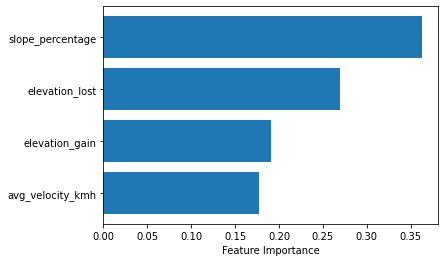

In [144]:
sort = model.feature_importances_.argsort()
plt.barh(ssDF.columns[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance")